> <h1>Distribution and Parameter Inference</h1>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

objdata = pd.read_excel('datasets/default of credit card clients.xls', skiprows=[1, 2])

In [24]:
from scipy.stats import norm, gamma
from scipy import stats

> <h2>Method of Moments</h2>

> <h4>data와 parameterized distribution을 매칭
> parameter를 update해서 distribution shape를 data histogram과 유사하게함   
> moments는 dist shape의 요약(shape, scale, skewness 등)을 묘사한다   
> moment statistics를 matching -> fit distribution</h4>

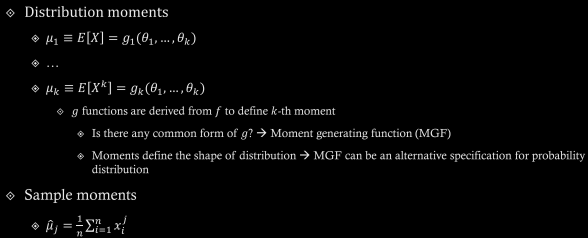

> <h4>Moment matching -> between dist moments and sample moments</h4>

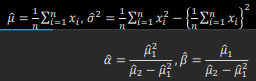

In [31]:
dblSampleMoment1 = 0
dblSampleMoment2 = 0

for i in range(len(objdata['X1'])):
    dblSampleMoment1 = dblSampleMoment1 + objdata['X1'][i]
    dblSampleMoment2 = dblSampleMoment2 + math.pow(objdata['X1'][i], 2)

dblSampleMoment1 = dblSampleMoment1 / float(len(objdata['X1']))
dblSampleMoment2 = dblSampleMoment2 / float(len(objdata['X1']))

In [32]:
dbl_Mu = dblSampleMoment1
dbl_SigmaSquared = dblSampleMoment2 - math.pow(dblSampleMoment1, 2)

dbl_alpha = math.pow(dblSampleMoment1, 2) / (dblSampleMoment2 - math.pow(dblSampleMoment1, 2))
dbl_beta = dblSampleMoment1 / (dblSampleMoment2 - math.pow(dblSampleMoment1, 2))

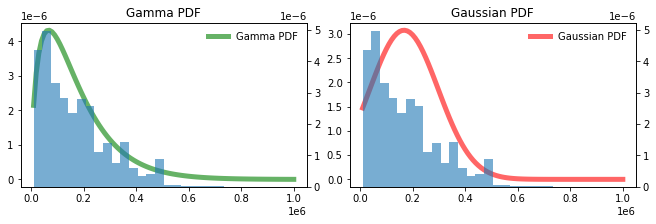

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (9, 3), constrained_layout = True)
axes1 = axes[0].twinx()

x = np.linspace(min(objdata['X1']), max(objdata['X1']), 100)
axes[0].plot(x, gamma.pdf(x, a = dbl_alpha, scale = 1/dbl_beta), 'g-', lw = 5, alpha = 0.6, label = 'Gamma PDF')
axes1.hist(objdata['X1'], bins = 30, density = True, alpha = 0.6)

axes[0].legend(loc = 'best', frameon = False)
axes[0].set_title('Gamma PDF')

axes2 = axes[1].twinx()

x = np.linspace(min(objdata['X1']), max(objdata['X1']), 100)
axes[1].plot(x, norm.pdf(x, dbl_Mu, math.sqrt(dbl_SigmaSquared)), 'r-', lw = 5, alpha = 0.6, label = 'Gaussian PDF')
axes2.hist(objdata['X1'], bins = 30, density = True, alpha = 0.6)

axes[1].legend(loc = 'best', frameon = False)
axes[1].set_title('Gaussian PDF')


plt.show()

> <h2>Distribution Fitting by SciPy</h2>

In [27]:
objresult = stats.rv_continuous.fit(norm, objdata['X1']) # Scipy를 이용 -> mean, sigma 계산 (Gaussian)
print('Mean, Sigma : ', objresult)
print()
print('--------------------------')
print()
objresult = stats.rv_continuous.fit(gamma, objdata['X1']) # SciPy를 이용 -> alpha, beta, location 계산 (Gamma)
print('Alpha from Scipy : ', objresult[0])
print('Location from Scipy : ', objresult[1])
print('Beta from Scipy : ', objresult[2])

Mean, Sigma :  (167489.24424801697, 129744.8639212595)

--------------------------

Alpha from Scipy :  1.1572769644988954
Location from Scipy :  9440.977446027482
Beta from Scipy :  136569.08902276176


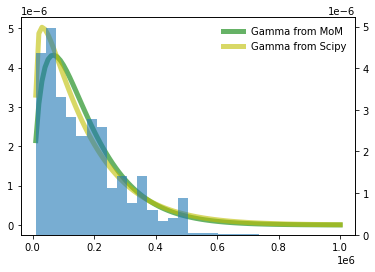

In [29]:
fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

x = np.linspace(min(objdata['X1']), max(objdata['X1']), 100)
ax1.plot(x, gamma.pdf(x, a = dbl_alpha, scale = 1 / dbl_beta), 'g-', lw = 5, alpha = 0.6, label = 'Gamma from MoM')
ax1.plot(x, gamma.pdf(x, objresult[0], objresult[1], objresult[2]), 'y-', lw = 5, alpha = 0.6, label = 'Gamma from Scipy')
ax2.hist(objdata['X1'], bins = 30, density = True, alpha = 0.6)

ax1.legend(loc = 'best', frameon = False)
plt.show()

> <h4>method of moments를 이용하여 직접 계산한 pdf와   
> scipy(maximum likelihood estimation)를 이용하여 그린 pdf와는
> 약간의 차이가 있음을 확인할 수 있다.</h4>